In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set()

In [2]:
# load datasets

train_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv')

In [3]:
# remove the first 'unnamed' column

train_df = train_df.iloc[:,1:]
test_df = test_df.iloc[:,1:]

In [4]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [5]:
# train N models for N features
# every model predicts a single feature
# on a faulty condition, there is a big difference between the target and the prediction
# calculated mean squared error for all predictions

scaler = preprocessing.MinMaxScaler()
features_df = train_df[train_df.faultNumber == 0].iloc[:,3:]
    # select values corresponding to fault type 0 and select from column 4 onwards
features_df = pd.DataFrame(scaler.fit_transform(X=features_df), columns = features_df.columns)
    # scale the dataframe


In [ ]:
features_df

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.475064,0.546864,0.553922,0.342491,0.502410,0.541063,0.479042,0.455087,0.588235,0.483488,...,0.409893,0.480777,0.628029,0.500000,0.463959,0.660638,0.554701,0.473079,0.500000,0.516351
1,0.477701,0.497640,0.633506,0.599260,0.412426,0.634461,0.489521,0.483248,0.588235,0.465426,...,0.327865,0.478160,0.314635,0.488903,0.481040,0.508478,0.346304,0.469467,0.518900,0.420388
2,0.475064,0.500674,0.406286,0.620658,0.494912,0.362856,0.507485,0.436177,0.647059,0.460226,...,0.562267,0.481118,0.506964,0.550879,0.485860,0.526080,0.500461,0.471251,0.488960,0.675883
3,0.472799,0.504046,0.505190,0.666887,0.432244,0.359098,0.522455,0.529291,0.470588,0.459314,...,0.460104,0.483355,0.371589,0.529313,0.486781,0.489019,0.543628,0.479521,0.572043,0.488933
4,0.637231,0.563722,0.461649,0.482631,0.502410,0.674181,0.491018,0.563001,0.470588,0.375296,...,0.388516,0.637749,0.453730,0.460218,0.407896,0.645781,0.548959,0.465941,0.546594,0.517424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.634260,0.432569,0.392445,0.293488,0.490627,0.528717,0.417665,0.592806,0.588235,0.504652,...,0.331593,0.654887,0.459073,0.373325,0.500532,0.327210,0.616016,0.507073,0.416542,0.540017
249996,0.627168,0.384019,0.488178,0.314622,0.502410,0.481481,0.423653,0.675437,0.470588,0.625433,...,0.431270,0.644498,0.530052,0.418970,0.664328,0.673637,0.723777,0.520044,0.439184,0.586276
249997,0.638457,0.298045,0.407728,0.294545,0.465453,0.565754,0.419162,0.422816,0.588235,0.674330,...,0.514044,0.633161,0.543312,0.363903,0.618045,0.557570,0.504101,0.522612,0.538735,0.585050
249998,0.483642,0.578894,0.431084,0.410118,0.662560,0.731616,0.375749,0.504008,0.470588,0.360427,...,0.337559,0.489573,0.534535,0.344012,0.421362,0.658660,0.342766,0.529097,0.233720,0.521330


In [6]:
# define training function

def train(dataframe, cols_to_predict):

    models = {}
        # initialize an empty dictionary to store trained models

    for col in cols_to_predict:
        print('Training model for ', col)
            # what column is being trained?
        model = lgb.LGBMRegressor(learning_rate=0.1, force_col_wise=True)
        train_x = features_df.drop([col], axis=1)
            # create training features by dropping the current column
            # because the current column is the target variable
        target = features_df[col]

        model.fit(X = train_x, y = target)
            # train the model

        models[col] = model
            # store the model in the dictionary

    return models
        # return the dictionary of trained models

# define prediction function

def predict(models, dataframe, cols_to_predict):

    predictions = []
        # initialize empty list to store predictions
    for col in cols_to_predict:
        test_x = dataframe.drop([col], axis=1)
        test_y = dataframe[col]

        prediction = models[col].predict(test_x)
        predictions.append(prediction)

    return predictions

In [7]:
features_to_predict = train_df.columns[3:]
dataframe_to_train = train_df[(train_df.faultNumber == 0) & (train_df.simulationRun.isin(range(400)))]

In [8]:
features_to_predict

Index(['XMEAS1', 'XMEAS2', 'XMEAS3', 'XMEAS4', 'XMEAS5', 'XMEAS6', 'XMEAS7',
       'XMEAS8', 'XMEAS9', 'XMEAS10', 'XMEAS11', 'XMEAS12', 'XMEAS13',
       'XMEAS14', 'XMEAS15', 'XMEAS16', 'XMEAS17', 'XMEAS18', 'XMEAS19',
       'XMEAS20', 'XMEAS21', 'XMEAS22', 'XMEAS23', 'XMEAS24', 'XMEAS25',
       'XMEAS26', 'XMEAS27', 'XMEAS28', 'XMEAS29', 'XMEAS30', 'XMEAS31',
       'XMEAS32', 'XMEAS33', 'XMEAS34', 'XMEAS35', 'XMEAS36', 'XMEAS37',
       'XMEAS38', 'XMEAS39', 'XMEAS40', 'XMEAS41', 'XMV1', 'XMV2', 'XMV3',
       'XMV4', 'XMV5', 'XMV6', 'XMV7', 'XMV8', 'XMV9', 'XMV10', 'XMV11'],
      dtype='object')

In [9]:
dataframe_to_train

,faultNumber,simulationRun,sample,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199495,0,399,496,0.24141,3658.5,4422.4,9.4134,26.775,42.297,2716.3,...,54.250,23.738,61.300,22.674,40.178,37.828,43.438,44.432,41.473,16.194
199496,0,399,497,0.24099,3729.0,4540.1,9.3604,26.769,42.060,2717.2,...,54.251,23.541,60.846,22.317,38.874,37.288,47.798,44.306,41.240,19.273
199497,0,399,498,0.24048,3682.4,4569.9,9.3197,27.035,42.448,2715.9,...,53.894,23.591,60.193,22.675,38.894,36.778,47.896,44.261,41.028,19.236
199498,0,399,499,0.25413,3648.0,4586.9,9.3660,26.697,42.511,2713.0,...,54.611,24.811,61.344,22.221,40.480,42.836,50.701,44.047,41.256,16.713


In [ ]:
len(dataframe_to_train.columns)

55

In [ ]:

# train the model
trained_models = train(dataframe_to_train, features_to_predict)

# THIS CELL TAKES 8 MINUTES. WE SAVE THE OUTPUT AND IMPORT IT FOR FASTER WORKFLOW
joblib.dump(trained_models, '/content/drive/MyDrive/Thesis/ensemble/trained_models_ensemble1.joblib')


Training model for  XMEAS1
[LightGBM] [Info] Total Bins 12768
[LightGBM] [Info] Number of data points in the train set: 250000, number of used features: 51
[LightGBM] [Info] Start training from score 0.475443
Training model for  XMEAS2
[LightGBM] [Info] Total Bins 12768
[LightGBM] [Info] Number of data points in the train set: 250000, number of used features: 51
[LightGBM] [Info] Start training from score 0.512427
Training model for  XMEAS3
[LightGBM] [Info] Total Bins 12768
[LightGBM] [Info] Number of data points in the train set: 250000, number of used features: 51
[LightGBM] [Info] Start training from score 0.495732
Training model for  XMEAS4
[LightGBM] [Info] Total Bins 12768
[LightGBM] [Info] Number of data points in the train set: 250000, number of used features: 51
[LightGBM] [Info] Start training from score 0.494520
Training model for  XMEAS5
[LightGBM] [Info] Total Bins 12768
[LightGBM] [Info] Number of data points in the train set: 250000, number of used features: 51
[LightGB

['/content/drive/MyDrive/Thesis/ensemble/trained_models_ensemble1.joblib']

In [10]:
trained_models_ensemble = joblib.load('/content/drive/MyDrive/Thesis/ensemble/trained_models_ensemble1.joblib')

In [11]:
trained_models_ensemble


{'XMEAS1': LGBMRegressor(force_col_wise=True),
 'XMEAS2': LGBMRegressor(force_col_wise=True),
 'XMEAS3': LGBMRegressor(force_col_wise=True),
 'XMEAS4': LGBMRegressor(force_col_wise=True),
 'XMEAS5': LGBMRegressor(force_col_wise=True),
 'XMEAS6': LGBMRegressor(force_col_wise=True),
 'XMEAS7': LGBMRegressor(force_col_wise=True),
 'XMEAS8': LGBMRegressor(force_col_wise=True),
 'XMEAS9': LGBMRegressor(force_col_wise=True),
 'XMEAS10': LGBMRegressor(force_col_wise=True),
 'XMEAS11': LGBMRegressor(force_col_wise=True),
 'XMEAS12': LGBMRegressor(force_col_wise=True),
 'XMEAS13': LGBMRegressor(force_col_wise=True),
 'XMEAS14': LGBMRegressor(force_col_wise=True),
 'XMEAS15': LGBMRegressor(force_col_wise=True),
 'XMEAS16': LGBMRegressor(force_col_wise=True),
 'XMEAS17': LGBMRegressor(force_col_wise=True),
 'XMEAS18': LGBMRegressor(force_col_wise=True),
 'XMEAS19': LGBMRegressor(force_col_wise=True),
 'XMEAS20': LGBMRegressor(force_col_wise=True),
 'XMEAS21': LGBMRegressor(force_col_wise=True),
 

In [12]:
# calculate the mean squared error (MSE)

def get_MSE(sample, predictions):

    squared_diff = np.square((sample.loc[:, features_to_predict] - np.transpose(predictions)))
    mse = squared_diff.mean(axis=1)


    return mse

In [13]:
normal_sample = pd.DataFrame(scaler.transform(train_df[(train_df.simulationRun==268) & (train_df.faultNumber==0)].iloc[:,3:]), columns = features_df.columns)

In [ ]:

normal_predictions = predict(trained_models_ensemble, normal_sample, features_to_predict)

# SAVE ANY OUTPUT TO AVOID LOSING YOUR MIND.
joblib.dump(normal_predictions, '/content/drive/MyDrive/Thesis/ensemble/normal_predictions_ensemble.joblib')



['/content/drive/MyDrive/Thesis/ensemble/normal_predictions_ensemble.joblib']

In [14]:
normal_predictions_ensemble = joblib.load('/content/drive/MyDrive/Thesis/ensemble/normal_predictions_ensemble.joblib')

In [ ]:
faulty_sample = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==1)].iloc[:,3:]), columns = features_df.columns)


In [34]:
faulty_sample_0 = pd.DataFrame(scaler.transform(train_df[(train_df.simulationRun.isin(range(46,50))) & (train_df.faultNumber==0)].iloc[:,3:]), columns = features_df.columns)
faulty_predictions_ensemble_0 = predict(trained_models_ensemble, faulty_sample_0, features_to_predict)

In [35]:
A = get_MSE(faulty_sample_0, faulty_predictions_ensemble_0)
A

0       0.001037
1       0.002392
2       0.005640
3       0.007376
4       0.005585
          ...   
1995    0.006394
1996    0.006252
1997    0.006718
1998    0.008136
1999    0.007900
Length: 2000, dtype: float64

In [36]:
MSE_threshold = 1.1*np.max(get_MSE(normal_sample, normal_predictions_ensemble))
MSE_threshold

0.012889516533499

In [37]:
false_alarms = np.where(A > MSE_threshold)
len(false_alarms[0])*100/len(A)

0.1

In [ ]:
normal_predictions_ensemble

[array([0.47385298, 0.47638643, 0.47498461, 0.47184931, 0.32376972,
        0.3215908 , 0.41123068, 0.40778089, 0.52173181, 0.52866096,
        0.50570891, 0.50202819, 0.36812855, 0.35803485, 0.5122646 ,
        0.50593096, 0.56621837, 0.57103886, 0.63126528, 0.63732397,
        0.54618118, 0.5353342 , 0.60711872, 0.61167136, 0.32371192,
        0.31575684, 0.47674891, 0.47925364, 0.41487636, 0.41367097,
        0.45543702, 0.45575908, 0.45329229, 0.45872598, 0.55081136,
        0.53970649, 0.46982872, 0.46188889, 0.49590944, 0.49911252,
        0.50230077, 0.50790038, 0.50633371, 0.51263644, 0.59883724,
        0.59291802, 0.53899068, 0.54930926, 0.70037036, 0.71663531,
        0.52515288, 0.52874037, 0.55908868, 0.56211546, 0.43773216,
        0.44192321, 0.49111035, 0.48939595, 0.4049075 , 0.40236313,
        0.41696235, 0.42241103, 0.53723711, 0.54273045, 0.51090775,
        0.51495569, 0.29017213, 0.29045462, 0.45556601, 0.45415384,
        0.3857201 , 0.38751715, 0.52536468, 0.53

-------


In [ ]:
faulty_sample_1 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==1)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_2 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==2)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_3 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==3)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_4 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==4)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_5 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==5)].iloc[:,3:]), columns = features_df.columns)

faulty_sample_6 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==6)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_7 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==7)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_8 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==8)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_9 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==9)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_10 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==10)].iloc[:,3:]), columns = features_df.columns)

faulty_sample_11 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==11)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_12 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==12)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_13 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==13)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_14 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==14)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_15 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==15)].iloc[:,3:]), columns = features_df.columns)

faulty_sample_16 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==16)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_17 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==17)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_18 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==18)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_19 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==19)].iloc[:,3:]), columns = features_df.columns)
faulty_sample_20 = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==20)].iloc[:,3:]), columns = features_df.columns)


In [ ]:
faulty_predictions_ensemble_1 = predict(trained_models_ensemble, faulty_sample_1, features_to_predict)
faulty_predictions_ensemble_2 = predict(trained_models_ensemble, faulty_sample_2, features_to_predict)
faulty_predictions_ensemble_3 = predict(trained_models_ensemble, faulty_sample_3, features_to_predict)
faulty_predictions_ensemble_4 = predict(trained_models_ensemble, faulty_sample_4, features_to_predict)
faulty_predictions_ensemble_5 = predict(trained_models_ensemble, faulty_sample_5, features_to_predict)

faulty_predictions_ensemble_6 = predict(trained_models_ensemble, faulty_sample_6, features_to_predict)
faulty_predictions_ensemble_7 = predict(trained_models_ensemble, faulty_sample_7, features_to_predict)
faulty_predictions_ensemble_8 = predict(trained_models_ensemble, faulty_sample_8, features_to_predict)
faulty_predictions_ensemble_9 = predict(trained_models_ensemble, faulty_sample_9, features_to_predict)
faulty_predictions_ensemble_10 = predict(trained_models_ensemble, faulty_sample_10, features_to_predict)

faulty_predictions_ensemble_11 = predict(trained_models_ensemble, faulty_sample_11, features_to_predict)
faulty_predictions_ensemble_12 = predict(trained_models_ensemble, faulty_sample_12, features_to_predict)
faulty_predictions_ensemble_13 = predict(trained_models_ensemble, faulty_sample_13, features_to_predict)
faulty_predictions_ensemble_14 = predict(trained_models_ensemble, faulty_sample_14, features_to_predict)
faulty_predictions_ensemble_15 = predict(trained_models_ensemble, faulty_sample_15, features_to_predict)

faulty_predictions_ensemble_16 = predict(trained_models_ensemble, faulty_sample_16, features_to_predict)
faulty_predictions_ensemble_17 = predict(trained_models_ensemble, faulty_sample_17, features_to_predict)
faulty_predictions_ensemble_18 = predict(trained_models_ensemble, faulty_sample_18, features_to_predict)
faulty_predictions_ensemble_19 = predict(trained_models_ensemble, faulty_sample_19, features_to_predict)
faulty_predictions_ensemble_20 = predict(trained_models_ensemble, faulty_sample_20, features_to_predict)


#joblib.dump(faulty_predictions, '/content/drive/MyDrive/Thesis/ensemble/faulty_predictions_ensemble.joblib')

In [ ]:
#faulty_predictions_ensemble = joblib.load('/content/drive/MyDrive/Thesis/ensemble/faulty_predictions_ensemble.joblib')

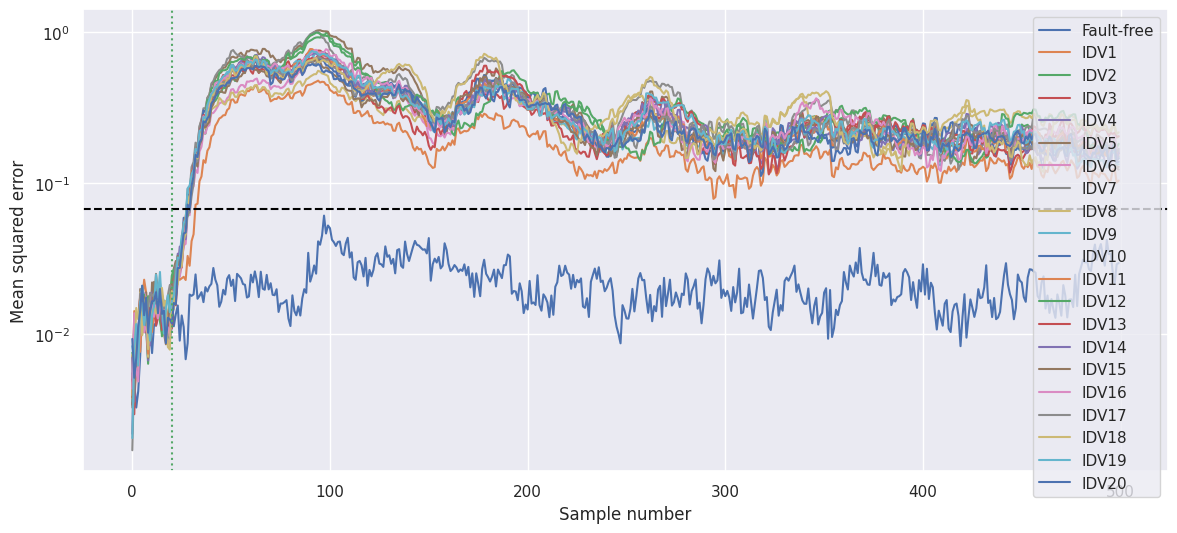

In [ ]:

max_allowable_MSE = np.max(get_MSE(normal_sample, normal_predictions_ensemble))

plt.figure(figsize=(14,6))
plt.yscale('log')

plt.plot(get_MSE(normal_sample, normal_predictions_ensemble), label='Fault-free')

plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_1), label='IDV1')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_2), label='IDV2')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_3), label='IDV3')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_4), label='IDV4')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_5), label='IDV5')

plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_6), label='IDV6')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_7), label='IDV7')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_8), label='IDV8')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_9), label='IDV9')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_10), label='IDV10')

plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_11), label='IDV11')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_12), label='IDV12')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_13), label='IDV13')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_14), label='IDV14')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_15), label='IDV15')

plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_16), label='IDV16')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_17), label='IDV17')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_18), label='IDV18')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_19), label='IDV19')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble_20), label='IDV20')


plt.xlabel('Sample number')
plt.ylabel('Mean squared error')
plt.legend(loc='best')

plt.axhline(y = max_allowable_MSE*1.1, color='black', linestyle='dashed')
plt.axvline(x = 20, color='g', linestyle = 'dotted') # metric probability

plt.show()


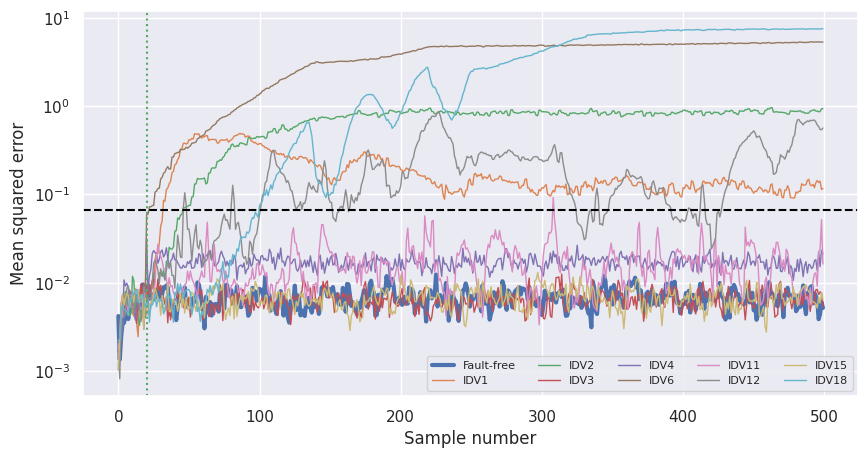

In [ ]:
# plot for different types of faults

plt.figure(figsize=(10,5))
plt.yscale('log')

faults = []

for i in range(1,21):
    faults.append(i)

#selected_faults = [0,1,2,3,4,5,6,11,9,15,19]
selected_faults = [0,1,2,3,4,6,11,12,15,18]
hopeless_faults = [0,3,4,5,9,10,11,15,16,19]

'''
for random_fault in range(5):

    selected_faults.append(faults.pop(np.random.randint(0,len(faults))))
        # choose random_faults
'''

for selected_fault in selected_faults:

    if selected_fault == 0:
        sample_branch = train_df[(train_df.simulationRun==500)].iloc[:,3:]
        #sample_branch = train_df[(train_df.simulationRun==500) & (train_df.faultNumber==selected_fault)].iloc[:,3:]
        label = 'Fault-free'
        order = 1
        lwt = 3 # lineweight
    else:
        sample_branch = test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==selected_fault)].iloc[:,3:]
        label = 'IDV%d' % selected_fault
        order = 2
        lwt = 1

    sample_branch = pd.DataFrame(scaler.transform(sample_branch), columns = features_df.columns)
    branch_predictions = predict(trained_models_ensemble, sample_branch, features_to_predict)

    plt.plot(get_MSE(sample_branch, branch_predictions), label=label, linewidth = lwt, zorder = order)
    plt.legend(loc='best', ncol=5, fontsize=8)

plt.xlabel('Sample number')
plt.ylabel('Mean squared error')
plt.axvline(x = 20, color = 'g', linestyle = 'dotted')
plt.axhline(y = max_allowable_MSE*1.1, color='black', linestyle='dashed')

plt.show()